In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import openai
import os
from llmlex.kanlex import KANLEX
import llmlex

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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",
)
llmlex.llm.check_key_limit(client)

72.23981694999998

Those with a checkmark found the correct expression, after some basic simplification, those with a cross did not

# $\times$ $\sqrt{|\sin(x)|}$

In [3]:
def univariate_function(x):
    return torch.sqrt(torch.abs(torch.sin(x[:,0])))

# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 4, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 13:59:33,091 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 7.89e-03 | test_loss: 8.21e-03 | reg: 1.84e+01 | : 100%|█| 50/50 [00:30<00:00,  1.67it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:00:04,597 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:00:04,611 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:00:05,763 - LLMLEx.kanLEx - INFO - Final train loss: 0.007887618616223335


0.007887618616223335

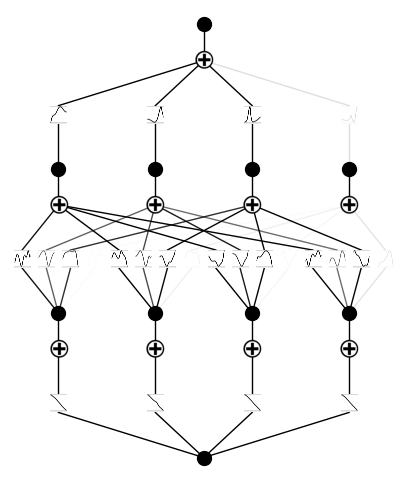

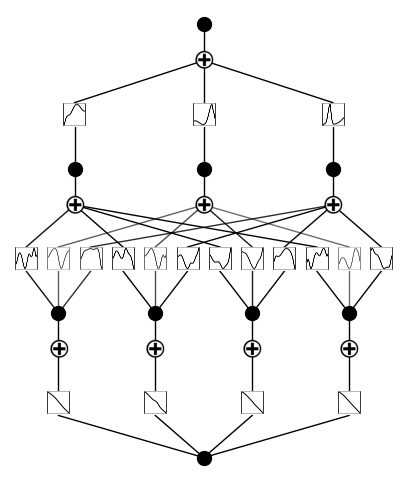

In [4]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

This suggests retraining with arch [1,4,3,1], however the first layer is all linear. We therefore proceed with architecture [1,3,1]

In [5]:
def univariate_function(x):
    return torch.sqrt(torch.abs(torch.sin(x)))

# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 3, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:00:06,537 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 8.69e-03 | test_loss: 9.00e-03 | reg: 7.66e+00 | : 100%|█| 50/50 [00:09<00:00,  5.10it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:00:16,868 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:00:16,877 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:00:17,237 - LLMLEx.kanLEx - INFO - Final train loss: 0.008689445443451405


0.008689445443451405

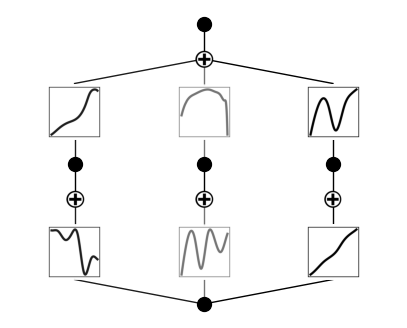

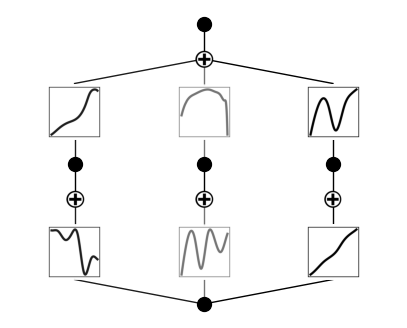

In [6]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

Now fit the KAN

2025-04-12 14:00:17,825 - LLMLEx.kanLEx - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-04-12 14:00:17,826 - LLMLEx.kanLEx - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-04-12 14:00:17,934 - llmlex.llmlex - INFO - Processing KAN model connections
2025-04-12 14:00:17,935 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,0)


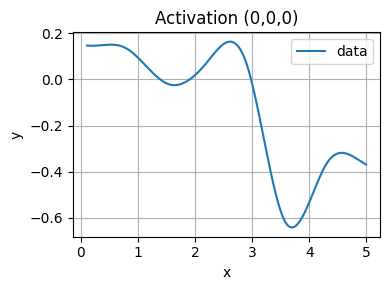

2025-04-12 14:00:18,025 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,0)
2025-04-12 14:00:18,267 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -2.831315755844116, for constant: [-0.11263331]
2025-04-12 14:00:18,267 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:00:19,715 - llmlex.llmlex - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't process or generate an ansatz for the given data.'
2025-04-12 14:00:21,892 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:00:21,893 - llmlex.llmlex - INFO - Initial population best: score=-0.3716904819011688, params=[ 0.18850394  2.17616023 -3.65953146  0.38687824  0.48177585  0.63520772], ansatz: params[0] * np.sin(params[1] * x + params[2]) + params[3] * np.cos(params[4] * x + params[5])...


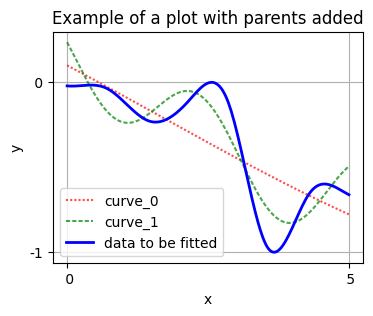

2025-04-12 14:00:21,953 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:00:24,303 - llmlex.llmlex - INFO - Generation 1 best: score=-0.08511532843112946, params=[ 0.1937328   2.98754598 -6.19956757  0.22471059  1.15949422 -1.99640893
 -0.06054706], ansatz: params[0] * np.sin(params[1] * x + params[2]) + params[3] * np.cos(params[4] * x + params[5]) + para...
2025-04-12 14:00:24,304 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:00:24,305 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 1
  Success rate: 85.71%

Breakdown by processing stage:
  Api Call: 7 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 1 failed (85.71% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - llm refusal: 1
Approximation for (0,0,0): params[0] * np.sin(params[1] * x + params[2]) + params[3] * np.cos(params[4] * x + params[5]) + params[6] * x, with score -0.08511532843112946 and parameters [ 0.194  2.988 -6.2    0.225  1.159 -1.996 -0.061]


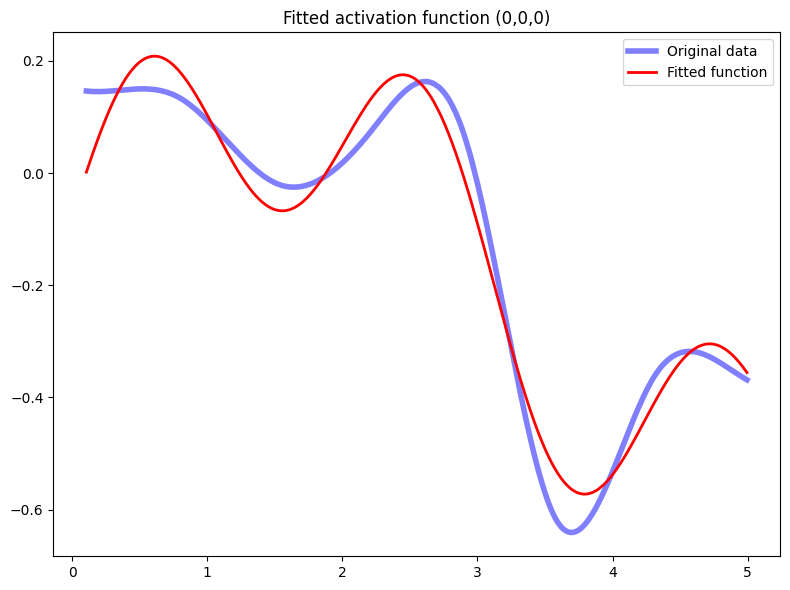

2025-04-12 14:00:24,399 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,1)


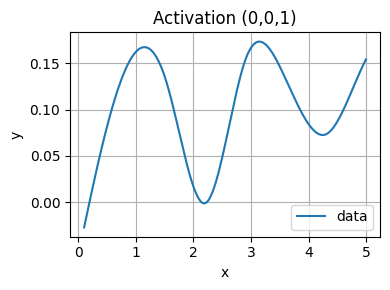

2025-04-12 14:00:24,469 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,1)
2025-04-12 14:00:24,470 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.515830636024475, for constant: [0.09941856]
2025-04-12 14:00:24,470 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:00:26,891 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:00:26,892 - llmlex.llmlex - INFO - Initial population best: score=-1.333289384841919, params=[0.15027747 0.61284263 0.05840389 1.2944739 ], ansatz: params[0] * np.sin(params[1] * x) + params[2] * np.cos(params[3] * x)...


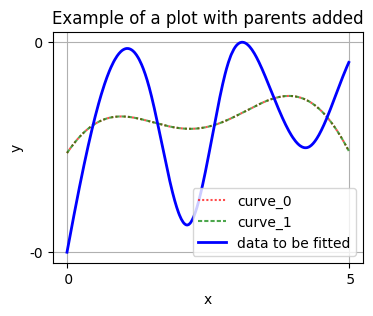

2025-04-12 14:00:26,960 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:00:30,784 - llmlex.llmlex - INFO - Generation 1 best: score=-0.7801697850227356, params=[ 0.04958753  2.39470865 -0.15832379 -0.38280725  0.04544958 -0.92391534], ansatz: params[0] * np.sin(params[1] * x) + params[2] * np.sin(params[3] * x) + params[4] * np.cos(params[5]...
2025-04-12 14:00:30,784 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:00:30,785 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,1)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,1): params[0] * np.sin(params[1] * x) + params[2] * np.sin(params[3] * x) + params[4] * np.cos(params[5] * x), with score -0.7801697850227356 and parameters [ 0.05   2.395 -0.158 -0.383  0.045 -0.924]


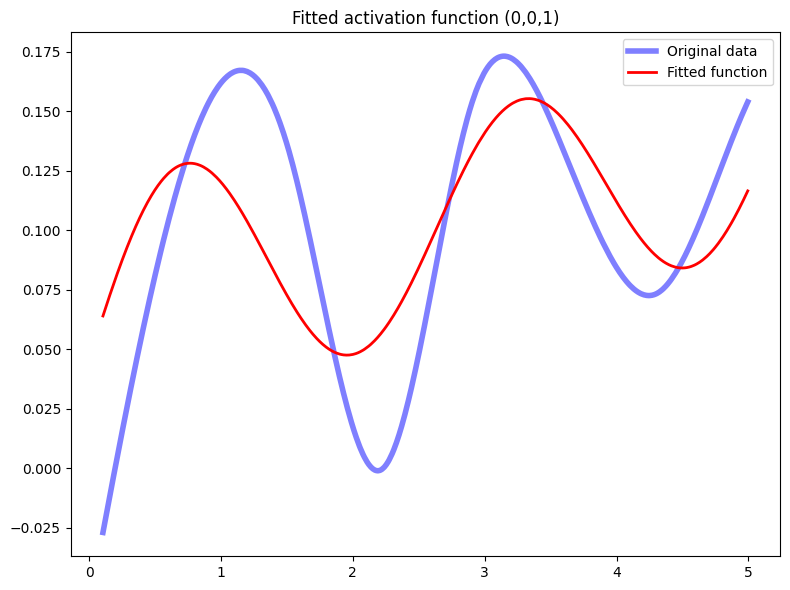

2025-04-12 14:00:30,911 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,2)


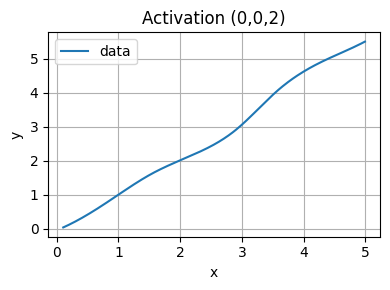

2025-04-12 14:00:30,978 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,2)
2025-04-12 14:00:30,980 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.373044490814209, for constant: [2.6967378]
2025-04-12 14:00:30,980 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:00:33,528 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:00:33,528 - llmlex.llmlex - INFO - Initial population best: score=-0.005890888627618551, params=[-0.03771287  1.33657615  0.92968216 -0.4023568 ], ansatz: params[0] + params[1]*x + params[2]*np.tanh(params[3]*x)...


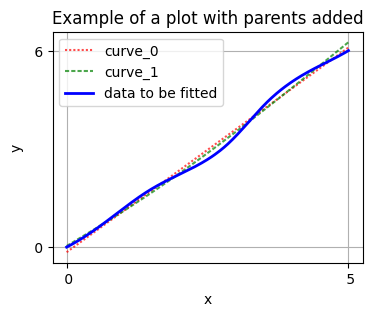

2025-04-12 14:00:33,575 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:00:37,031 - llmlex.llmlex - INFO - Generation 1 best: score=-0.004224942997097969, params=[-0.4987157   1.30409605 -0.25927253  2.15071387 -3.74762058], ansatz: params[0] + params[1]*x + params[2]*np.tanh(params[3]*x + params[4])...
2025-04-12 14:00:37,031 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:00:37,032 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,2)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,2): params[0] + params[1]*x + params[2]*np.tanh(params[3]*x + params[4]), with score -0.004224942997097969 and parameters [-0.499  1.304 -0.259  2.151 -3.748]


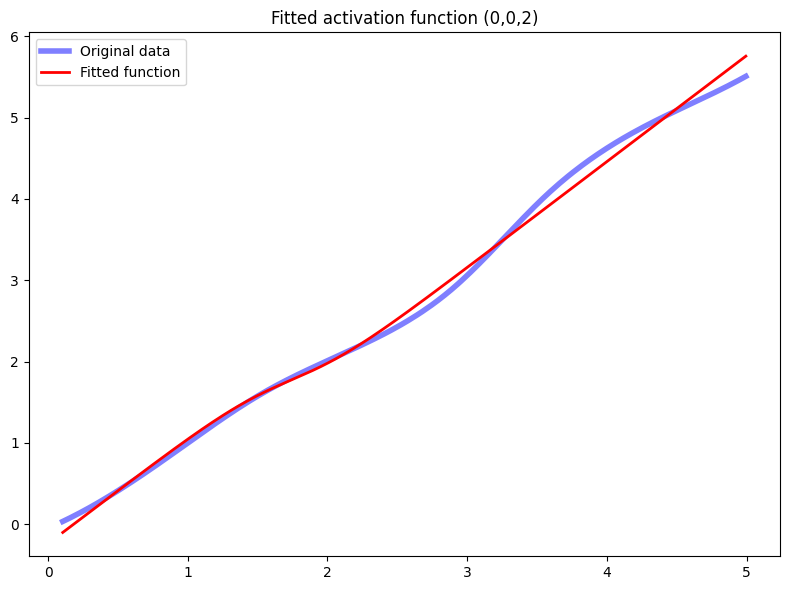

2025-04-12 14:00:37,117 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,0,0)


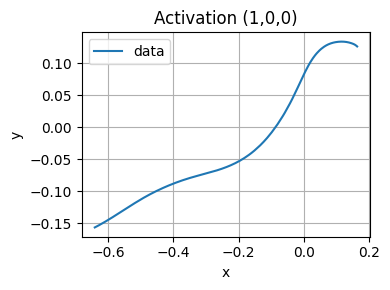

2025-04-12 14:00:37,189 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,0,0)
2025-04-12 14:00:37,191 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -3.47459077835083, for constant: [0.03093142]
2025-04-12 14:00:37,191 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:00:39,077 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:00:39,078 - llmlex.llmlex - INFO - Initial population best: score=-0.05473913624882698, params=[0.26360299 1.86785709 0.07204194], ansatz: params[0] * np.tanh(params[1] * x) + params[2]...


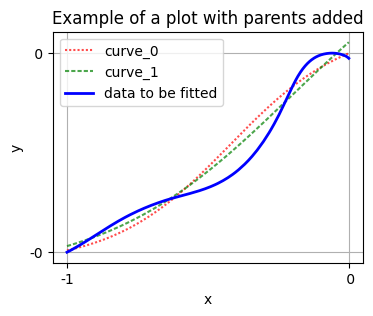

2025-04-12 14:00:39,147 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:00:41,642 - llmlex.llmlex - INFO - Generation 1 best: score=-0.04771788418292999, params=[ 0.2774839   2.37055012  0.29834612 -0.14502112], ansatz: params[0] * np.tanh(params[1] * x + params[2]) + params[3] * x...
2025-04-12 14:00:41,643 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:00:41,643 - llmlex.llmlex - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,0,0): params[0] * np.tanh(params[1] * x + params[2]) + params[3] * x, with score -0.04771788418292999 and parameters [ 0.277  2.371  0.298 -0.145]


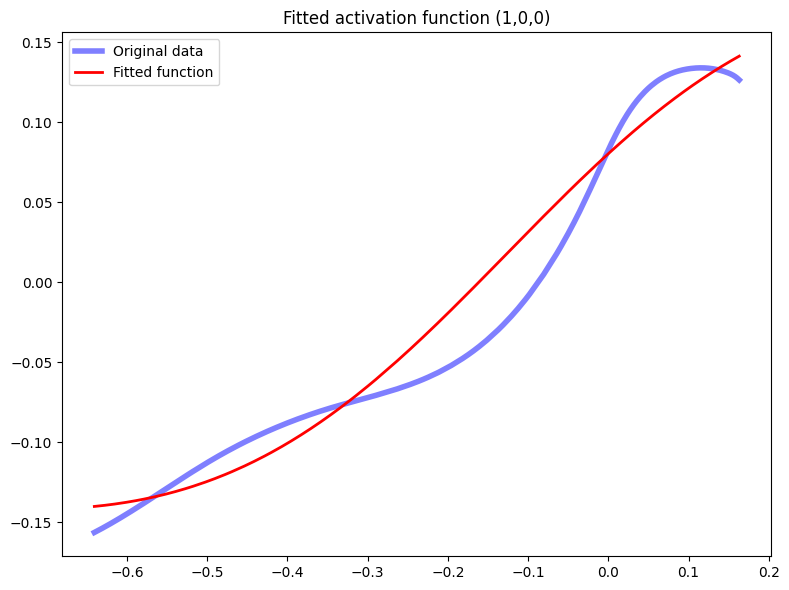

2025-04-12 14:00:41,746 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,1,0)


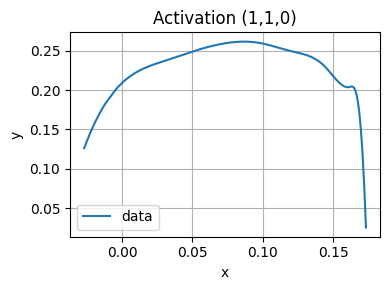

2025-04-12 14:00:41,810 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,1,0)
2025-04-12 14:00:41,811 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -6.301789283752441, for constant: [0.22724822]
2025-04-12 14:00:41,811 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:00:43,070 - llmlex.llmlex - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, but I can't assist with that.'
2025-04-12 14:00:43,222 - llmlex.llmlex - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm unable to provide a new ansatz based on the image since it doesn't show data points explicitly.'
2025-04-12 14:00:43,967 - llmlex.llmlex - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't assist with that.'
2025-04-12 14:00:44,563 - llmlex.llmlex - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't help with identifying or int

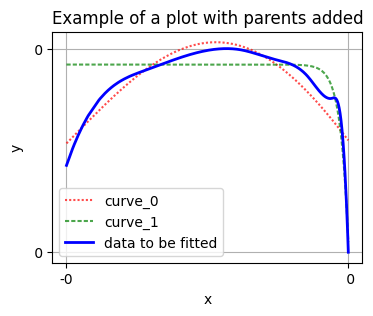

2025-04-12 14:00:57,569 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:01:00,203 - llmlex.llmlex - INFO - Generation 1 best: score=-1.018122673034668, params=[-1046.803112      88.75096876   -19.98009788 -1046.56012484], ansatz: params[0] * np.tanh(params[1] * x + params[2]) + params[3]...
2025-04-12 14:01:00,204 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:01:00,204 - llmlex.llmlex - INFO - Successfully found expression for connection (1,1,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 20
  Success rate: 23.08%

Breakdown by processing stage:
  Api Call: 23 succeeded, 3 failed (88.46% success)
  Ansatz Extraction: 6 succeeded, 17 failed (26.09% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 4
    - llm refusal: 16
Approximation for (1,1,0): params[0] / (1 + np.exp(-params[1] * (x - params[2]))) + params[3], with score -1.0181134939193726 and parameters [-1.0788227e+04  1.7749400e+02  2.3400000e-01  2.4300000e-01]


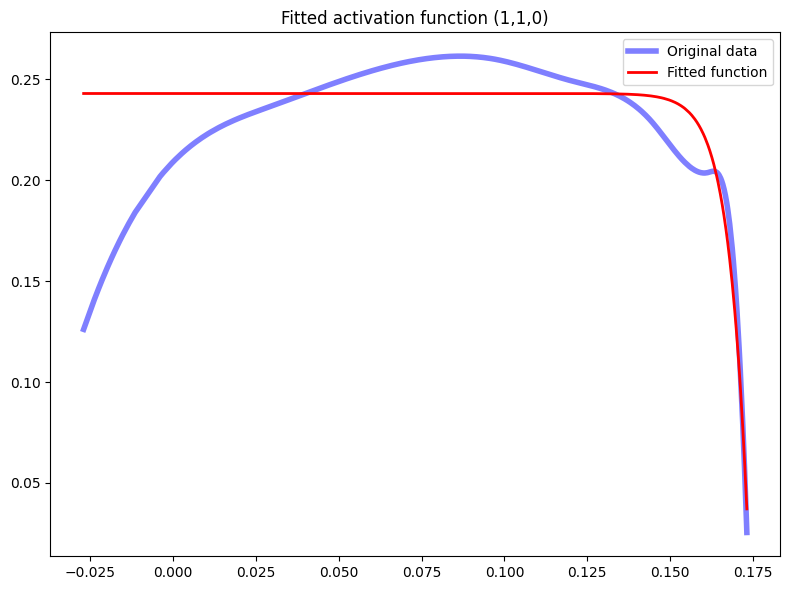

2025-04-12 14:01:00,286 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,2,0)


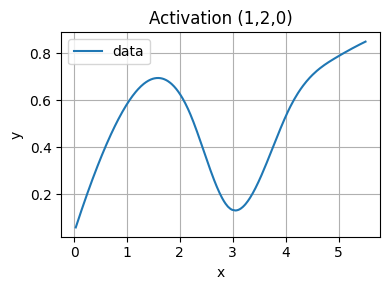

2025-04-12 14:01:00,352 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,2,0)
2025-04-12 14:01:00,354 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.7754472494125366, for constant: [0.52783005]
2025-04-12 14:01:00,354 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:01:03,175 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:01:03,176 - llmlex.llmlex - INFO - Initial population best: score=-0.15118953585624695, params=[ 0.3134662   1.85110836 -1.24254228  0.45688011], ansatz: params[0] * np.sin(params[1] * x + params[2]) + params[3]...


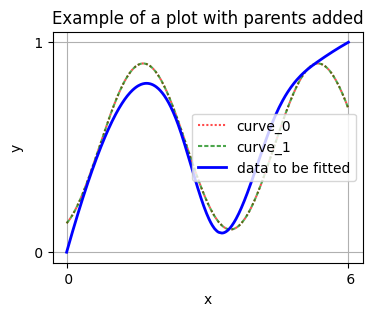

2025-04-12 14:01:03,246 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:01:05,632 - llmlex.llmlex - INFO - Generation 1 best: score=-0.04721029847860336, params=[ 0.29414728  1.77180943 -0.97861922  0.59461873  0.10656593  5.3138241 ], ansatz: params[0] * np.sin(params[1] * x + params[2]) + params[3] * np.cos(params[4] * x + params[5])...
2025-04-12 14:01:05,632 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:01:05,632 - llmlex.llmlex - INFO - Successfully found expression for connection (1,2,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,2,0): params[0] * np.sin(params[1] * x + params[2]) + params[3] * np.cos(params[4] * x + params[5]), with score -0.04721029847860336 and parameters [ 0.294  1.772 -0.979  0.595  0.107  5.314]


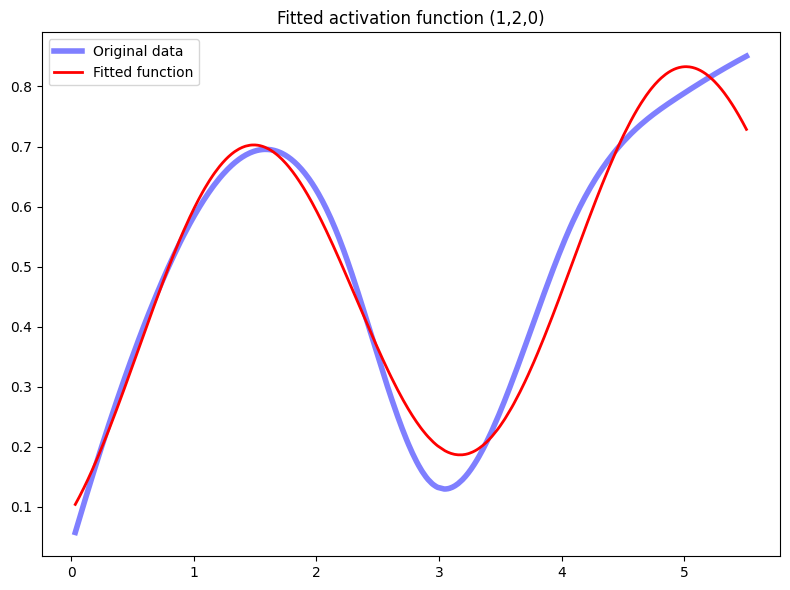

2025-04-12 14:01:05,716 - llmlex.llmlex - INFO - KAN conversion complete: 6 total connections
2025-04-12 14:01:05,716 - llmlex.llmlex - INFO - Connection breakdown: 0 symbolic, 0 zero, 6 processed
2025-04-12 14:01:05,815 - llmlex.llmlex - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-04-12 14:01:05,816 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 0): params[0] * np.sin(params[1] * x + params[2]) + params[3] * np.cos(params[4] * x + params[5]) + params[6] * x, has parameters [ 0.2  3.  -6.2  0.2  1.2 -2.  -0.1]
2025-04-12 14:01:05,816 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 1): params[0] * np.sin(params[1] * x) + params[2] * np.sin(params[3] * x) + params[4] * np.cos(params[5] * x), has parameters [ 0.   2.4 -0.2 -0.4  0.  -0.9]
2025-04-12 14:01:05,817 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 2): params[0] + params[1]*x + params[2]*np.tanh(params[3]*x + params[4]), has parameters [-0.5  1.3 -0.3  2.2 -3.7]
2025-04-12 14:01:05,817 - LLML

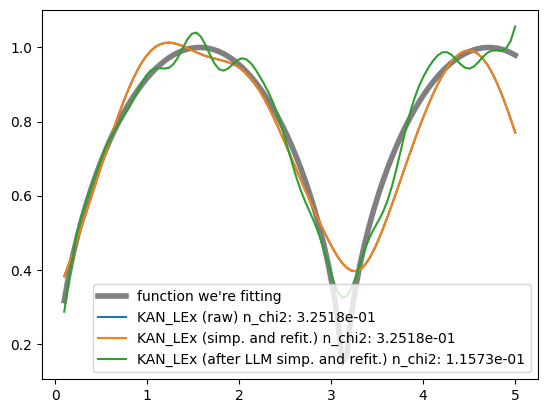

2025-04-12 14:05:08,518 - LLMLEx.kanLEx - INFO - 
###############################
# Raw and Refitted Results for output 0 (4sf): #
###############################
2025-04-12 14:05:08,519 - LLMLEx.kanLEx - INFO - Raw expression n_chi2 3.252e-01: ((exp(28.1*sin(0.3828*x0) + 8.801*sin(2.395*x0) + 8.067*cos(0.9239*x0)) + 1.164e+18)*(0.008781*x0 - 0.0281*sin(2.988*x0 - 6.2) - 0.2941*sin(-2.311*x0 + 0.4594*tanh(2.151*x0 - 3.748) + 1.862) - 0.03259*cos(1.159*x0 - 1.996) + 0.5946*cos(0.139*x0 - 0.02763*tanh(2.151*x0 - 3.748) + 5.261) + 0.2775*tanh(-0.1435*x0 + 0.4593*sin(2.988*x0 - 6.2) + 0.5327*cos(1.159*x0 - 1.996) + 0.2983) + 0.243) - 1.079e+04*exp(28.1*sin(0.3828*x0) + 8.801*sin(2.395*x0) + 8.067*cos(0.9239*x0)))/(exp(28.1*sin(0.3828*x0) + 8.801*sin(2.395*x0) + 8.067*cos(0.9239*x0)) + 1.164e+18)
2025-04-12 14:05:08,519 - LLMLEx.kanLEx - INFO - Refitted expression n_chi2 3.252e-01: ((exp(28.1*sin(0.3828*x0) + 8.801*sin(2.395*x0) + 8.067*cos(0.9239*x0)) + 1.164e+18)*(0.008781*x0 - 0.0281*sin

In [7]:
best_expressions, best_chi_squareds, results_dicts, results_all_dicts = univariate_kansr.get_symbolic(
    client=client,
    population=3,
    generations=2,
    temperature=0.1,
    gpt_model="openai/gpt-4o",
    verbose=1,
    use_async=True,
    plot_fit=True,
    plot_parents=True,
    demonstrate_parent_plotting=True
)

In [8]:
best_expressions

['0.682890169518497*x0 - 0.0223121902953985*np.sin(9.99826007097449*x0 + 8.14082888389651) - 0.0152254557834264*np.sin(13.6661638141891*x0 + 40.3423711769323) + 0.599375887414649*np.cos(1.24390195311605*x0 + 3.84858662188757) + 0.267284154254343*np.cos(3.2360922884738*x0 - 6.97319164003705) - 0.975627255455497*np.tanh(2.02115822316516*x0 - 3.26053549477579) - 0.60453274597047']

# $\times$ $e^{1.83169 -\frac{3.35509}{x}}$

In [10]:
def univariate_function(x):
    return torch.exp(1.83169 - 3.35509/x[:,0])

# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 4, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:24:35,096 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.13e-02 | test_loss: 1.11e-02 | reg: 2.26e+01 | : 100%|█| 50/50 [00:21<00:00,  2.33it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:24:57,908 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:24:57,920 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:24:58,666 - LLMLEx.kanLEx - INFO - Final train loss: 0.011299457401037216


0.011299457401037216

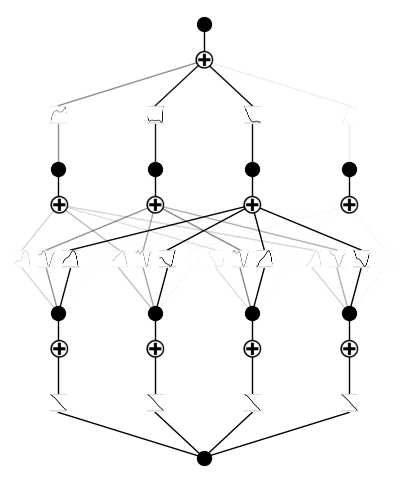

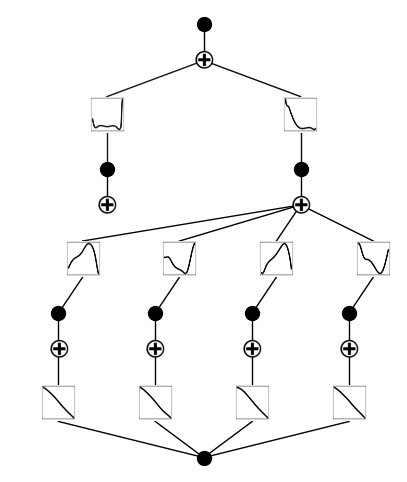

In [11]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

This suggests a [1,4,2,1]

In [16]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 2, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:29:48,706 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 4.10e-04 | test_loss: 4.04e-04 | reg: 1.78e+01 | : 100%|█| 50/50 [00:14<00:00,  3.35it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:30:04,448 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:30:04,459 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:30:04,955 - LLMLEx.kanLEx - INFO - Final train loss: 0.0004103807732462883


0.0004103807732462883

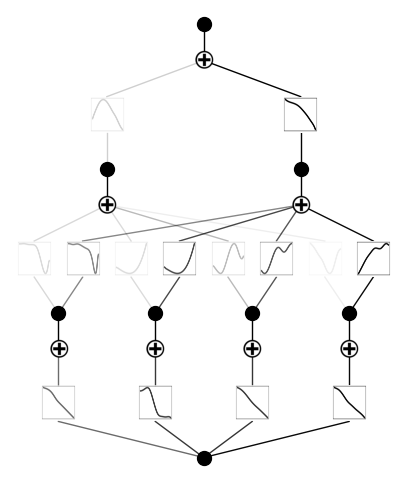

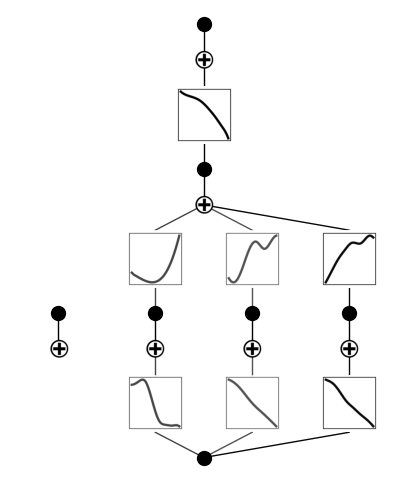

In [17]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

Now a [1,3,1,1] KAN, but two in first layer are still linear - we therefore go fora  [1,1,1] KAN

In [18]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 3, 1, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:30:20,066 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 4.91e-04 | test_loss: 4.96e-04 | reg: 1.33e+01 | : 100%|█| 50/50 [00:10<00:00,  4.90it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:30:30,915 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:30:30,927 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:30:31,221 - LLMLEx.kanLEx - INFO - Final train loss: 0.0004906081594526768


0.0004906081594526768

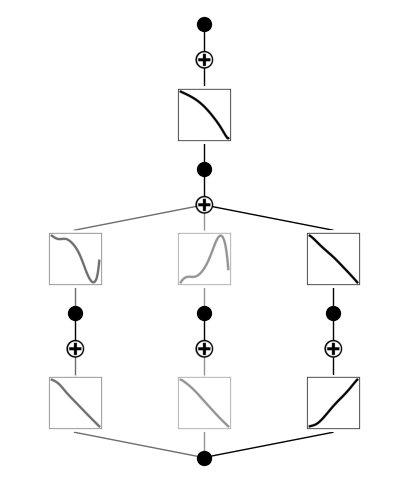

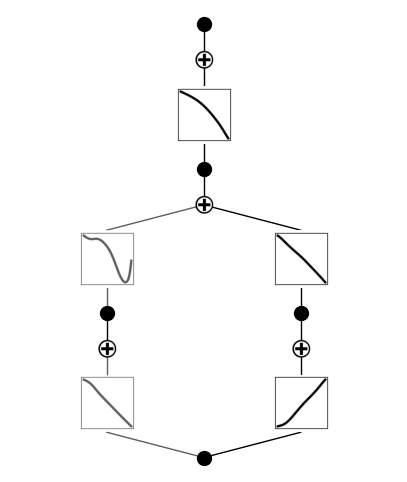

In [19]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

Now a [1,2,1,1] KAN

In [20]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 2, 1, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:31:03,760 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 8.27e-05 | test_loss: 8.17e-05 | reg: 1.07e+01 | : 100%|█| 50/50 [00:10<00:00,  4.84it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:31:14,432 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:31:14,443 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:31:14,743 - LLMLEx.kanLEx - INFO - Final train loss: 8.27174517326057e-05


8.27174517326057e-05

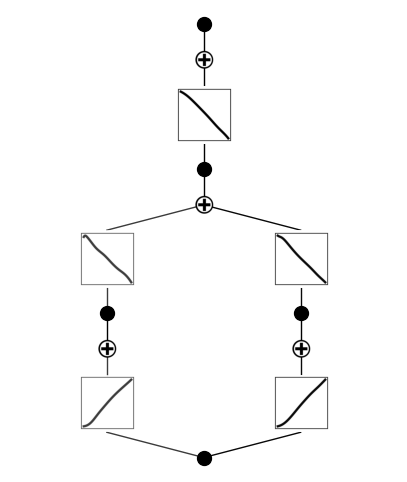

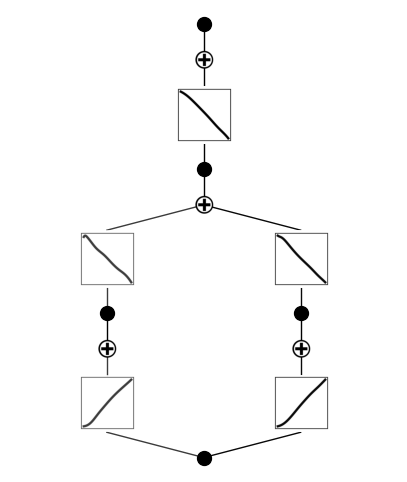

In [21]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

Now fit the KAN

2025-04-12 14:31:56,671 - LLMLEx.kanLEx - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-04-12 14:31:56,672 - LLMLEx.kanLEx - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-04-12 14:31:56,773 - llmlex.llmlex - INFO - Processing KAN model connections
2025-04-12 14:31:56,774 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,0)


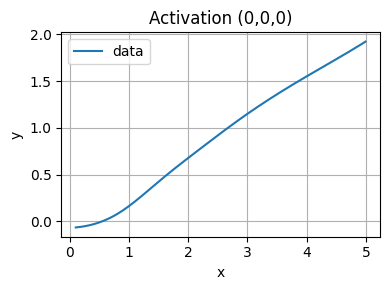

2025-04-12 14:31:56,863 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,0)
2025-04-12 14:31:57,114 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.1423020362854004, for constant: [0.88918966]
2025-04-12 14:31:57,114 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:32:00,027 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:32:00,028 - llmlex.llmlex - INFO - Initial population best: score=-0.021731415763497353, params=[0.02604253 0.27769589], ansatz: params[0] * x**2 + params[1] * x...


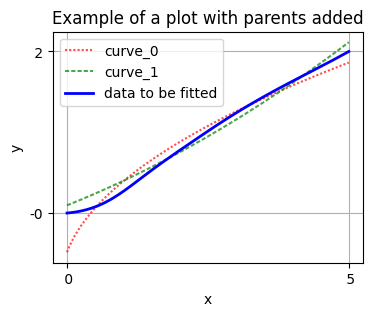

2025-04-12 14:32:00,093 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:32:03,134 - llmlex.llmlex - INFO - Generation 1 best: score=-0.01219340693205595, params=[-0.31016388  0.48967267], ansatz: params[0] * np.arctan(x) + params[1] * x...
2025-04-12 14:32:03,135 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:32:03,136 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,0): params[0] * np.arctan(x) + params[1] * x, with score -0.01219340693205595 and parameters [-0.31  0.49]


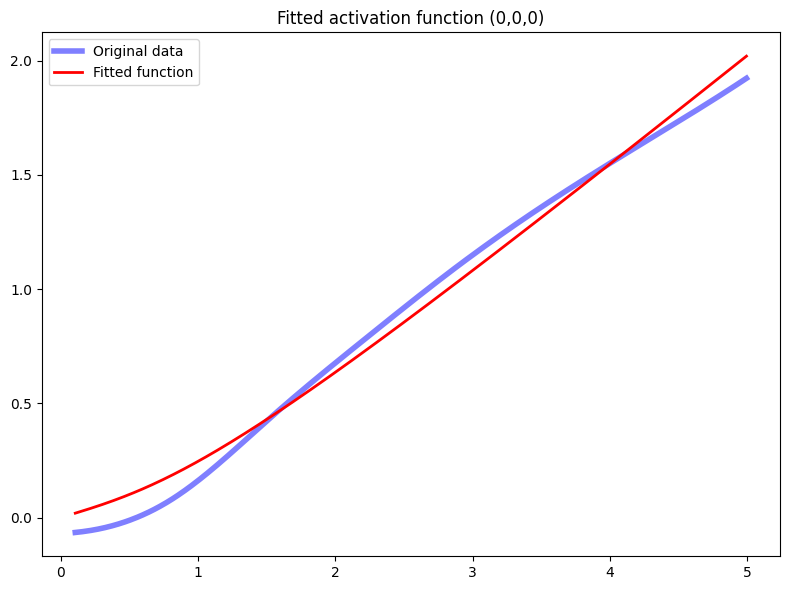

2025-04-12 14:32:03,233 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,1)


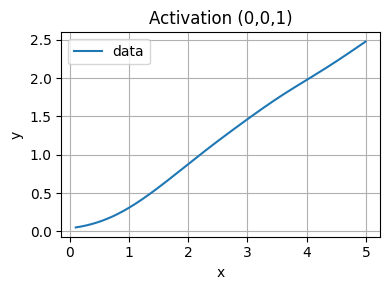

2025-04-12 14:32:03,297 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,1)
2025-04-12 14:32:03,299 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.1010262966156006, for constant: [1.17106464]
2025-04-12 14:32:03,299 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:32:05,076 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:32:05,077 - llmlex.llmlex - INFO - Initial population best: score=-0.048033326864242554, params=[ 1.46887931 -1.03322635], ansatz: params[0] * np.sqrt(x) + params[1]...


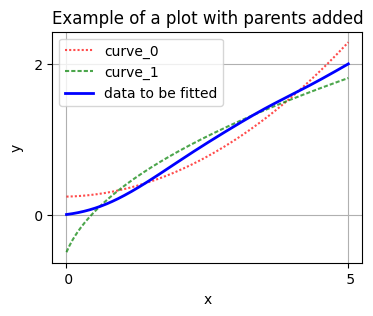

2025-04-12 14:32:05,142 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:32:10,679 - llmlex.llmlex - INFO - Generation 1 best: score=-0.002503808820620179, params=[-0.26685867  0.62602141], ansatz: params[0] * np.sqrt(x) + params[1] * x...
2025-04-12 14:32:10,680 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:32:10,680 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,1)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 1
  Success rate: 85.71%

Breakdown by processing stage:
  Api Call: 7 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 7 succeeded, 0 failed (100.00% success)
  Function Conversion: 7 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 1 failed (85.71% success)

Error types:
  Fitting Errors:
    - numerical error: 1

Fitting warnings:
  - invalid log: 2
Approximation for (0,0,1): params[0] * np.sqrt(x) + params[1] * x, with score -0.002503808820620179 and parameters [-0.267  0.626]


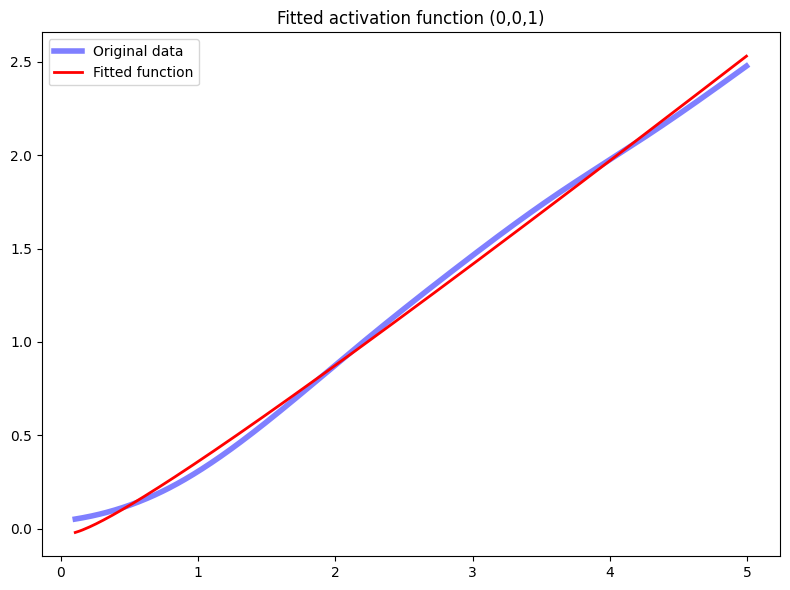

2025-04-12 14:32:10,774 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,0,0)


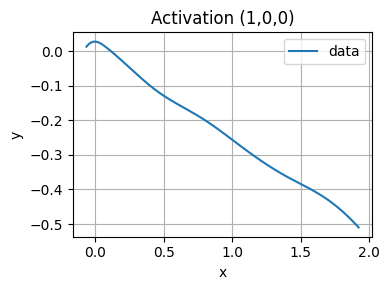

2025-04-12 14:32:10,855 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,0,0)
2025-04-12 14:32:10,857 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.1980829238891602, for constant: [-0.22289894]
2025-04-12 14:32:10,857 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:32:19,007 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:32:19,008 - llmlex.llmlex - INFO - Initial population best: score=-0.0022439579479396343, params=[-0.03112897 -0.24957649  0.01867111], ansatz: params[0] * np.sin(x) + params[1] * x + params[2]...


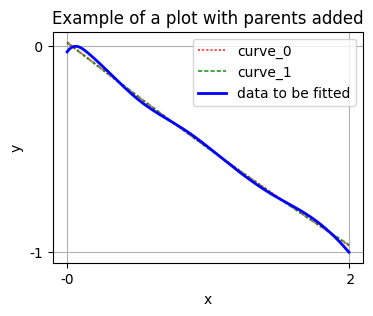

2025-04-12 14:32:19,076 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:32:21,987 - llmlex.llmlex - INFO - Generation 1 best: score=-0.002278143772855401, params=[-0.04482511 -0.22924723  0.01806313], ansatz: params[0] * np.sin(x) + params[1] * x + params[2] * np.cos(x)...
2025-04-12 14:32:21,989 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:32:21,989 - llmlex.llmlex - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,0,0): params[0] * np.sin(x) + params[1] * x + params[2], with score -0.0022439579479396343 and parameters [-0.031 -0.25   0.019]


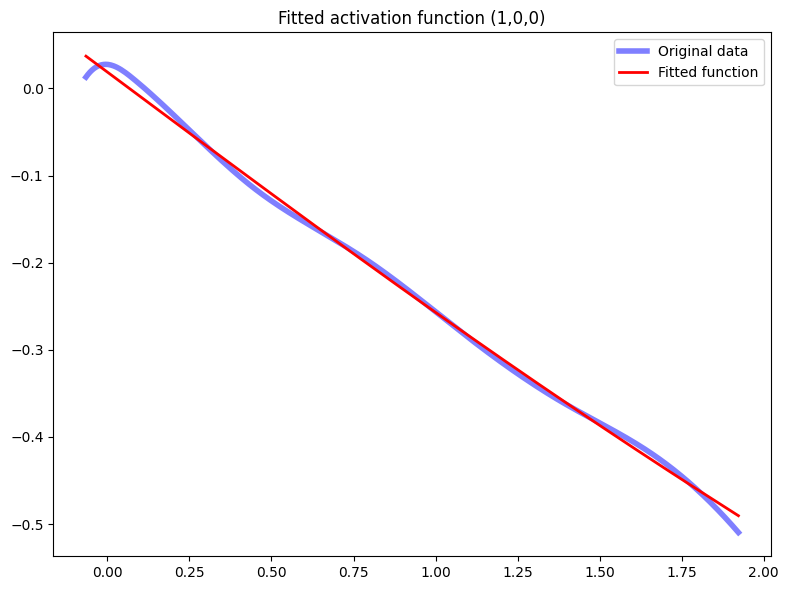

2025-04-12 14:32:22,090 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,1,0)


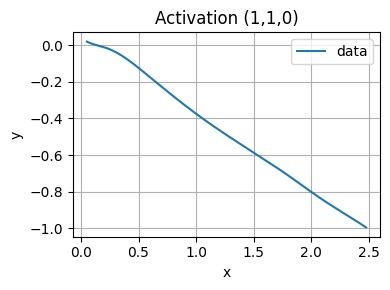

2025-04-12 14:32:22,155 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,1,0)
2025-04-12 14:32:22,157 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.0528115034103394, for constant: [-0.43860685]
2025-04-12 14:32:22,157 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:32:23,981 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:32:23,982 - llmlex.llmlex - INFO - Initial population best: score=-0.0015449797501787543, params=[-0.00576216 -0.43174992  0.07087302], ansatz: params[0] * np.sin(x) + params[1] * x + params[2]...


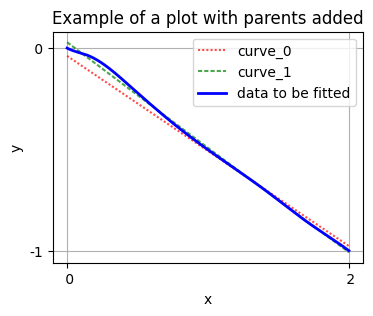

2025-04-12 14:32:24,041 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:32:26,038 - llmlex.llmlex - INFO - Generation 1 best: score=-0.0014688899973407388, params=[ 0.03640699 -0.40490545  0.02511301], ansatz: params[0] * np.cos(x) + params[1] * x + params[2]...
2025-04-12 14:32:26,040 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:32:26,041 - llmlex.llmlex - INFO - Successfully found expression for connection (1,1,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,1,0): params[0] * np.cos(x) + params[1] * x + params[2], with score -0.0014688899973407388 and parameters [ 0.036 -0.405  0.025]


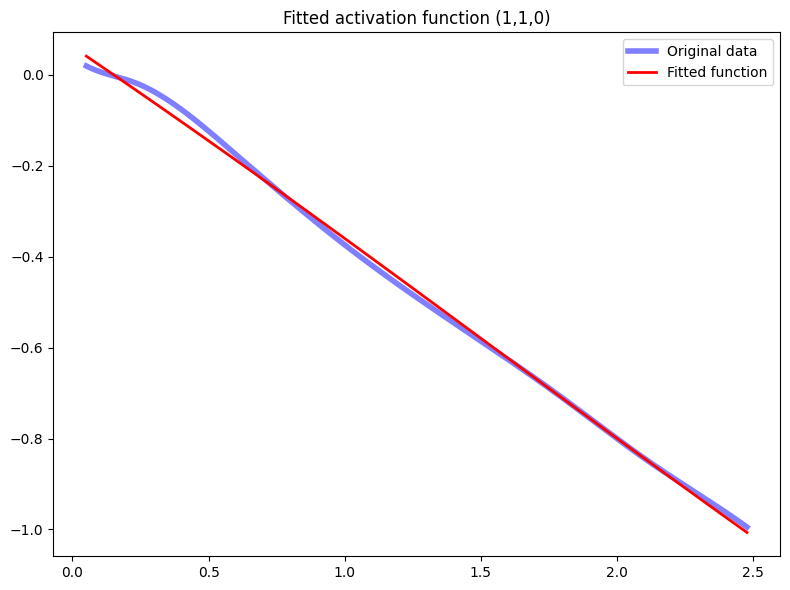

2025-04-12 14:32:26,137 - llmlex.llmlex - INFO - Processing non-symbolic activation function (2,0,0)


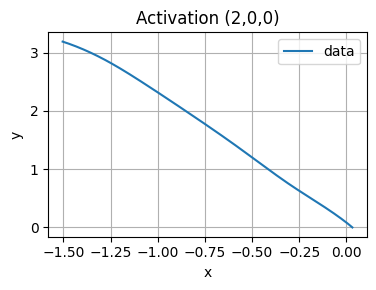

2025-04-12 14:32:26,204 - llmlex.llmlex - INFO - Running genetic algorithm for connection (2,0,0)
2025-04-12 14:32:26,205 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.0652271509170532, for constant: [1.53842768]
2025-04-12 14:32:26,206 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 14:32:30,603 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 14:32:30,604 - llmlex.llmlex - INFO - Initial population best: score=-0.001597714377567172, params=[-2.17418895  0.10018909], ansatz: params[0] * x + params[1]...


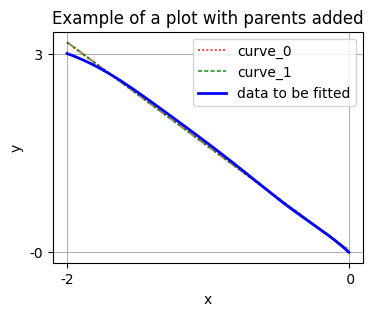

2025-04-12 14:32:30,655 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 14:32:32,704 - llmlex.llmlex - INFO - Generation 1 best: score=-0.0015985878417268395, params=[ 3.25558704e+04 -6.67803263e-05 -3.25557702e+04], ansatz: params[0] * np.exp(params[1] * x) + params[2]...
2025-04-12 14:32:32,704 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 14:32:32,704 - llmlex.llmlex - INFO - Successfully found expression for connection (2,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors

Fitting warnings:
  - covariance estimation: 1
  - invalid log: 4
Approximation for (2,0,0): params[0] * x + params[1], with score -0.001597714377567172 and parameters [-2.174  0.1  ]


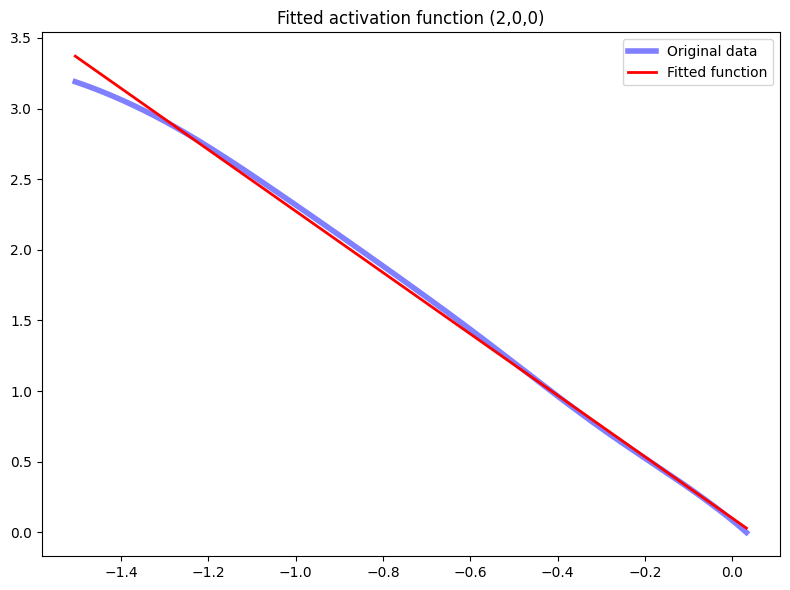

2025-04-12 14:32:32,792 - llmlex.llmlex - INFO - KAN conversion complete: 5 total connections
2025-04-12 14:32:32,792 - llmlex.llmlex - INFO - Connection breakdown: 0 symbolic, 0 zero, 5 processed
2025-04-12 14:32:32,918 - llmlex.llmlex - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-04-12 14:32:32,919 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 0): params[0] * np.arctan(x) + params[1] * x, has parameters [-0.3  0.5]
2025-04-12 14:32:32,919 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 1): params[0] * np.sqrt(x) + params[1] * x, has parameters [-0.3  0.6]
2025-04-12 14:32:32,920 - LLMLEx.kanLEx - INFO - Approximation for (1, 0, 0): params[0] * np.sin(x) + params[1] * x + params[2], has parameters [-0.  -0.2  0. ]
2025-04-12 14:32:32,921 - LLMLEx.kanLEx - INFO - Approximation for (1, 1, 0): params[0] * np.cos(x) + params[1] * x + params[2], has parameters [ 0.  -0.4  0. ]
2025-04-12 14:32:32,921 - LLMLEx.kanLEx - INFO - Approximation for (2, 0, 0): p

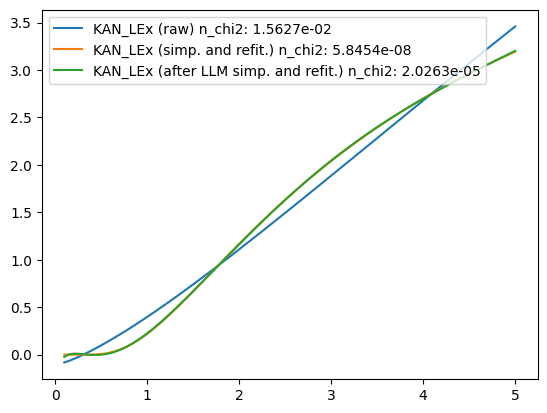

2025-04-12 14:33:48,200 - LLMLEx.kanLEx - INFO - 
###############################
# Raw and Refitted Results for output 0 (4sf): #
###############################
2025-04-12 14:33:48,201 - LLMLEx.kanLEx - INFO - Raw expression n_chi2 1.563e-02: -0.2349*sqrt(x0) + 0.8168*x0 + 0.06768*sin(0.4897*x0 - 0.3102*atan(1*x0)) - 0.07916*cos(0.2669*sqrt(x0) - 0.626*x0) - 0.1683*atan(1*x0) + 0.004994
2025-04-12 14:33:48,201 - LLMLEx.kanLEx - INFO - Refitted expression n_chi2 5.845e-08: -1.668*sqrt(x0) + 2.684*x0 + 22.77*sin(0.593*x0 - 0.874*atan(0.9349*x0)) + 19.17*cos(0.146*sqrt(x0) + 0.5705*x0) + 6.84*atan(0.9349*x0) - 18.94
2025-04-12 14:33:48,201 - LLMLEx.kanLEx - INFO - Best LLM expression n_chi2 2.026e-05: 2*sqrt(x0) + 0.5404*x0 + 0.6698*sin(0.6557*x0) - 2.424*atan(1.407*x0) - 0.4147
2025-04-12 14:33:48,201 - LLMLEx.kanLEx - INFO - 
###############################
# Final formula for output 0: #
###############################
2025-04-12 14:33:48,202 - LLMLEx.kanLEx - INFO - Best expression 

In [22]:
best_expressions, best_chi_squareds, results_dicts, results_all_dicts = univariate_kansr.get_symbolic(
    client=client,
    population=3,
    generations=2,
    temperature=0.1,
    gpt_model="openai/gpt-4o",
    verbose=1,
    use_async=True,
    plot_fit=True,
    plot_parents=True,
    demonstrate_parent_plotting=True
)

In [23]:
best_expressions

['-1.66821921678742*np.sqrt(x0) + 2.68422145151564*x0 + 22.7674737685782*np.sin(0.593010305348744*x0 - 0.874020320610048*np.arctan(0.934863712744735*x0)) + 19.1661057097778*np.cos(0.145985756606738*np.sqrt(x0) + 0.570507471738279*x0) + 6.83981301352777*np.arctan(0.934863712744735*x0) - 18.9361625137552']

# ? $\left(\sqrt{x}+1.44439\right) (\log (x)+\pi )$

In [3]:
def univariate_function(x):
    return (torch.sqrt(x[:,0])+1.44439)*(torch.log(x[:,0])+torch.pi)

# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 4, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:37:34,126 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.62e+00 | test_loss: 1.57e+00 | reg: 5.36e+01 | : 100%|█| 50/50 [00:29<00:00,  1.72it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:38:04,637 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:38:04,649 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:38:05,397 - LLMLEx.kanLEx - INFO - Final train loss: 1.6212656497955322


1.6212656497955322

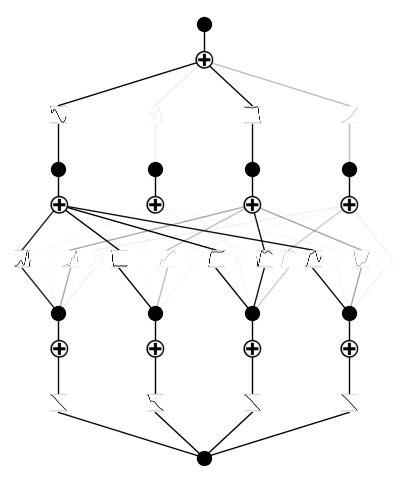

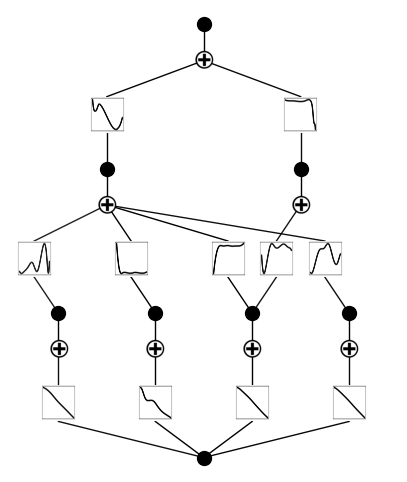

In [4]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

This suggests a [1,4,2,1] KAN

In [5]:
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 2, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:38:31,338 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 50/50 [00:16<00:00,  3.04it/s]

saving model version 0.1
Unpruned model. Pruning? True


UnboundLocalError: cannot access local variable 'alpha_mask' where it is not associated with a value

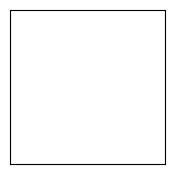

In [6]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

# ? $e^{\cos (x)}-0.0126997$

In [7]:
def univariate_function(x):
    return torch.exp(torch.cos(x[:,[0]])) - 0.0126997

# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 4, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:40:13,012 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 2.03e-03 | test_loss: 1.99e-03 | reg: 1.97e+01 | : 100%|█| 50/50 [00:17<00:00,  2.83it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:40:32,240 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:40:32,255 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:40:33,274 - LLMLEx.kanLEx - INFO - Final train loss: 0.002026340225711465


0.002026340225711465

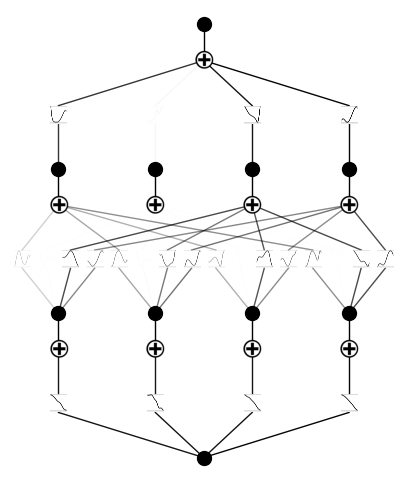

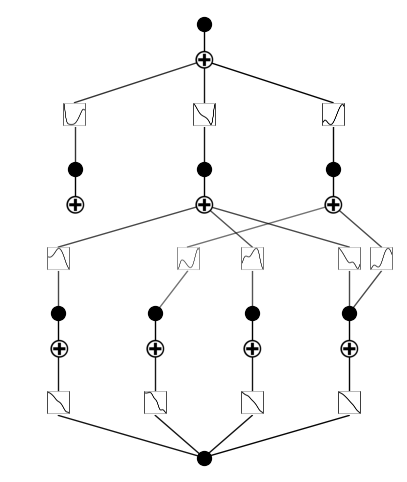

In [8]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

This suggests a [1,4,3,1] KAN, but one node is dissconnected - we got for a [1,4,2,1] KAN

In [9]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 2, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:41:32,584 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.10e-03 | test_loss: 1.09e-03 | reg: 1.78e+01 | : 100%|█| 50/50 [00:13<00:00,  3.70it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:41:46,908 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:41:46,919 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:41:47,652 - LLMLEx.kanLEx - INFO - Final train loss: 0.0010998400393873453


0.0010998400393873453

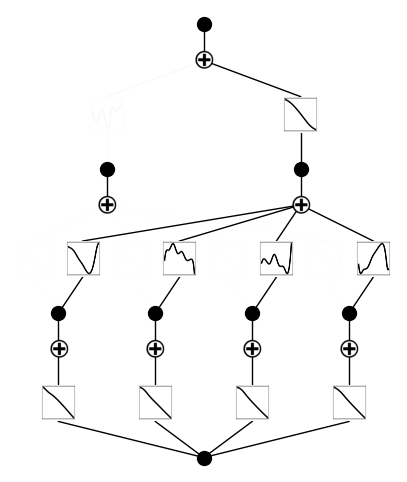

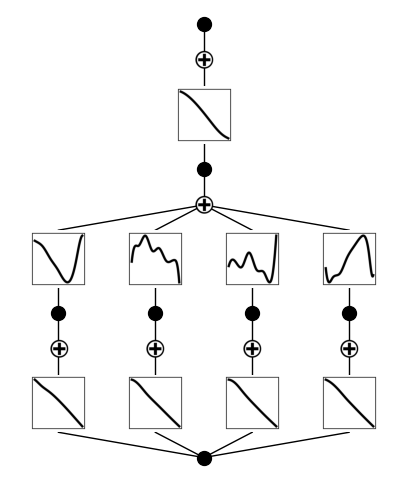

In [10]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

The number of linears is suggesting to try a [1,1] KAN - i.e. what we usually do with LLM_LEx. As such we terminate here

# ? $\sin \left(\log \left(\frac{4.1746}{x}\right)\right)$

In [11]:
def univariate_function(x):
    return torch.sin(torch.log(4.1746/x[:,0]))

# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 4, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:44:50,078 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.14e-03 | test_loss: 1.14e-03 | reg: 1.52e+01 | : 100%|█| 50/50 [00:24<00:00,  2.00it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:45:16,454 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:45:16,466 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:45:17,234 - LLMLEx.kanLEx - INFO - Final train loss: 0.0011367035331204534


0.0011367035331204534

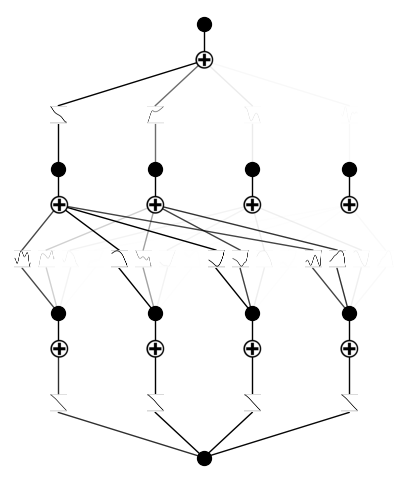

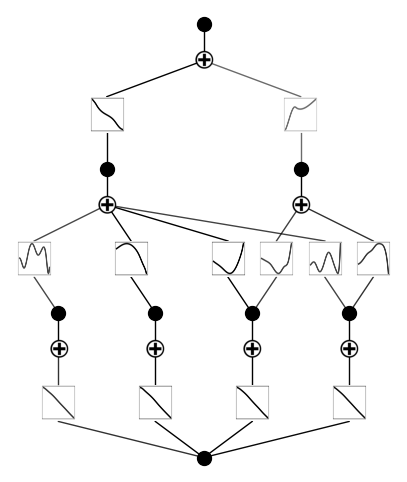

In [12]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

This suggests a [1,4,2,1] KAN

In [14]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 2, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:45:53,830 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.45e-03 | test_loss: 1.43e-03 | reg: 1.44e+01 | : 100%|█| 50/50 [00:13<00:00,  3.74it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:46:07,959 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:46:07,971 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:46:08,893 - LLMLEx.kanLEx - INFO - Final train loss: 0.0014540849952027202


0.0014540849952027202

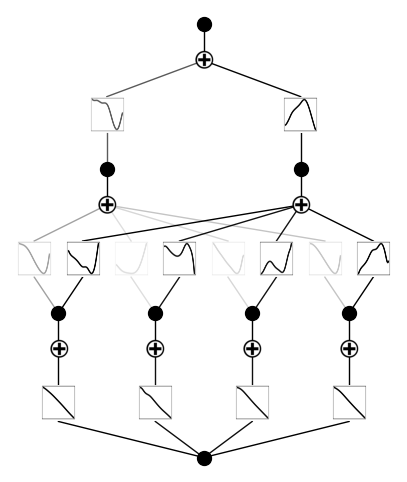

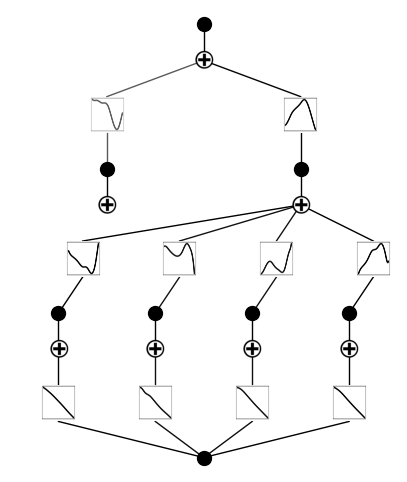

In [15]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

This suggests a [1,4,1,1] KAN

In [16]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 1, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:47:00,935 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.31e-01 | test_loss: 1.46e-01 | reg: 1.28e+01 | : 100%|█| 50/50 [00:17<00:00,  2.81it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:47:19,236 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:47:19,247 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:47:19,811 - LLMLEx.kanLEx - INFO - Final train loss: 0.131461039185524


0.131461039185524

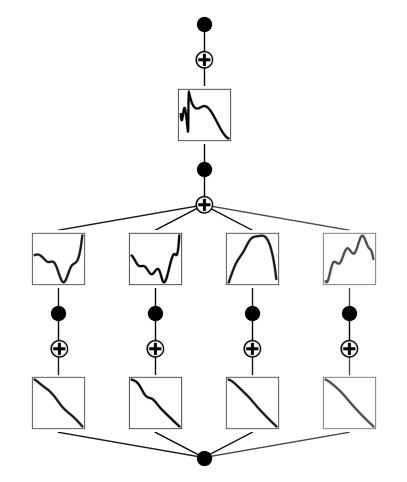

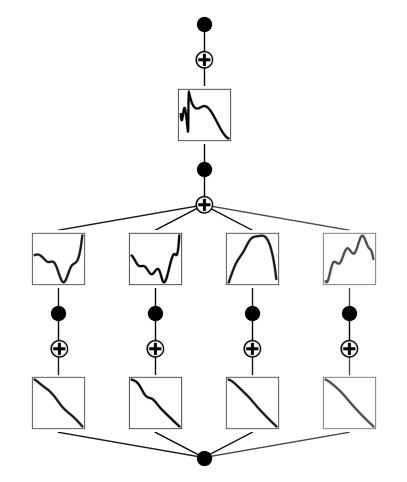

In [17]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

The number of linears is suggesting to try a [1,1] KAN - i.e. what we usually do with LLM_LEx. As such we terminate here

# $\checkmark$ $2e^{-3x} + e^{-x}$

In [3]:
def univariate_function(x):
    return 2.0 * torch.exp(-3.0 * x[:,[0]]) + torch.exp(-x[:,[0]])

# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 4, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 13:38:52,870 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.74e-03 | test_loss: 1.80e-03 | reg: 1.75e+01 | : 100%|█| 50/50 [00:23<00:00,  2.15it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 13:39:17,452 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 13:39:17,468 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 13:39:18,216 - LLMLEx.kanLEx - INFO - Final train loss: 0.0017440931405872107


0.0017440931405872107

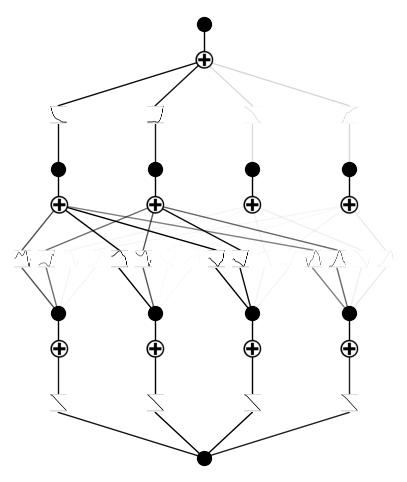

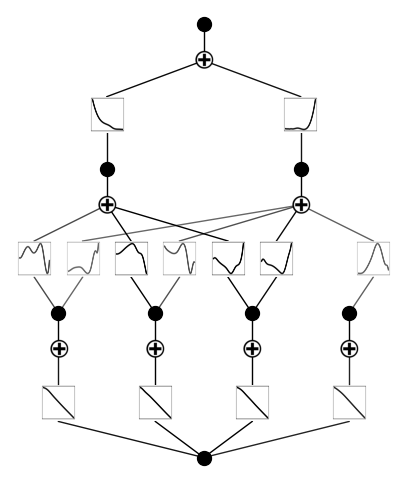

In [4]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

This suggests retraining with arch [1,4,2,1], however the first layer is all linear. We therefore proceed with architecture [1,2,1]

In [5]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 2, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 13:39:18,858 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.45e-04 | test_loss: 1.43e-04 | reg: 7.57e+00 | : 100%|█| 50/50 [00:06<00:00,  7.25it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 13:39:25,990 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 13:39:25,998 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 13:39:26,221 - LLMLEx.kanLEx - INFO - Final train loss: 0.00014536567323375493


0.00014536567323375493

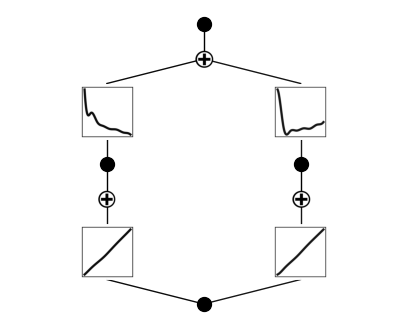

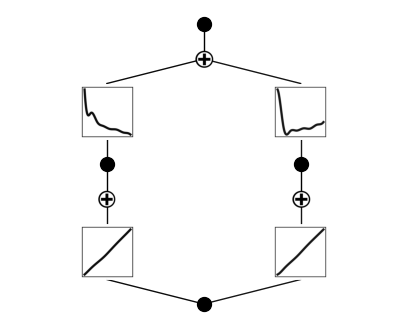

In [6]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

Now fit the KAN

2025-04-12 13:39:26,616 - LLMLEx.kanLEx - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-04-12 13:39:26,616 - LLMLEx.kanLEx - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-04-12 13:39:26,752 - llmlex.llmlex - INFO - Processing KAN model connections
2025-04-12 13:39:26,754 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,0)


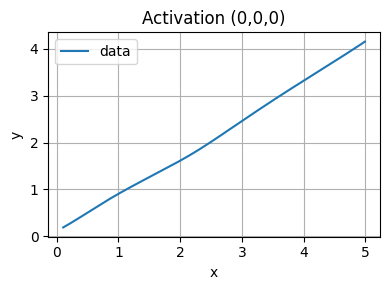

2025-04-12 13:39:26,851 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,0)
2025-04-12 13:39:27,408 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.3629921674728394, for constant: [2.09039472]
2025-04-12 13:39:27,409 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:39:28,810 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:39:28,810 - llmlex.llmlex - INFO - Initial population best: score=-0.0016438951715826988, params=[0.80814346 0.06163361], ansatz: params[0] * x + params[1]...


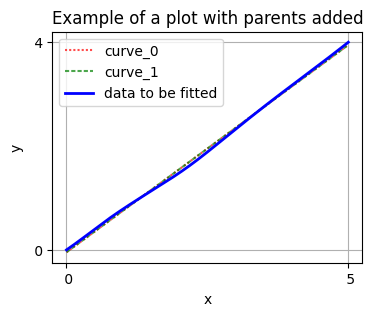

2025-04-12 13:39:28,871 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 13:39:34,003 - llmlex.llmlex - INFO - Generation 1 best: score=-0.002592196222394705, params=[0.8266736], ansatz: params[0] * x...
2025-04-12 13:39:34,004 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 13:39:34,004 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,0): params[0] * x + params[1], with score -0.0016438951715826988 and parameters [0.808 0.062]


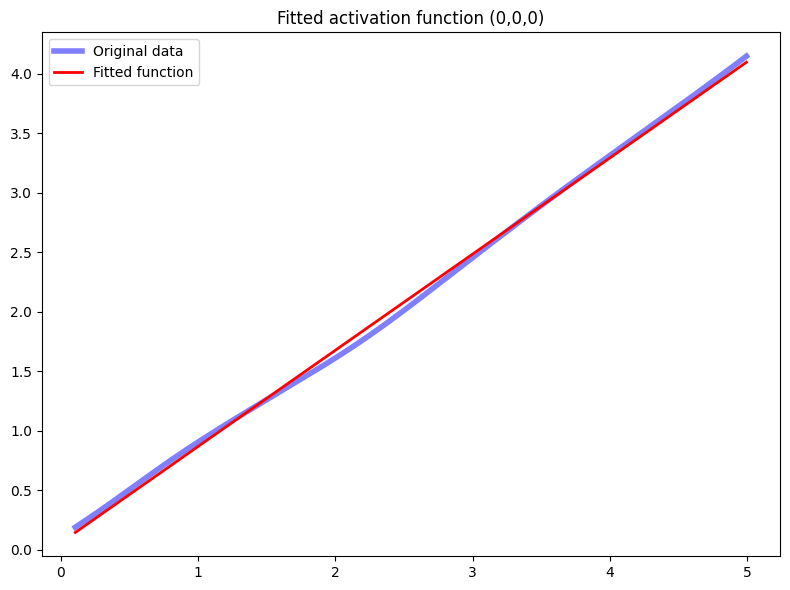

2025-04-12 13:39:34,101 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,1)


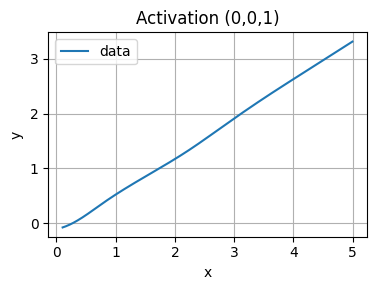

2025-04-12 13:39:34,171 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,1)
2025-04-12 13:39:34,173 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.3156142234802246, for constant: [1.56426282]
2025-04-12 13:39:34,173 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:39:40,637 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:39:40,638 - llmlex.llmlex - INFO - Initial population best: score=-0.00042952908552251756, params=[ 0.70408739 -0.2032762 ], ansatz: params[0] * x + params[1]...
2025-04-12 13:39:40,639 - llmlex.llmlex - INFO - Exit condition met after initial population
2025-04-12 13:39:40,639 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,1)



API Call Statistics:
  Successful calls (end-to-end): 3
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 3 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 3 succeeded, 0 failed (100.00% success)
  Function Conversion: 3 succeeded, 0 failed (100.00% success)
  Curve Fitting: 3 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,1): params[0] * x + params[1], with score -0.00042952908552251756 and parameters [ 0.704 -0.203]


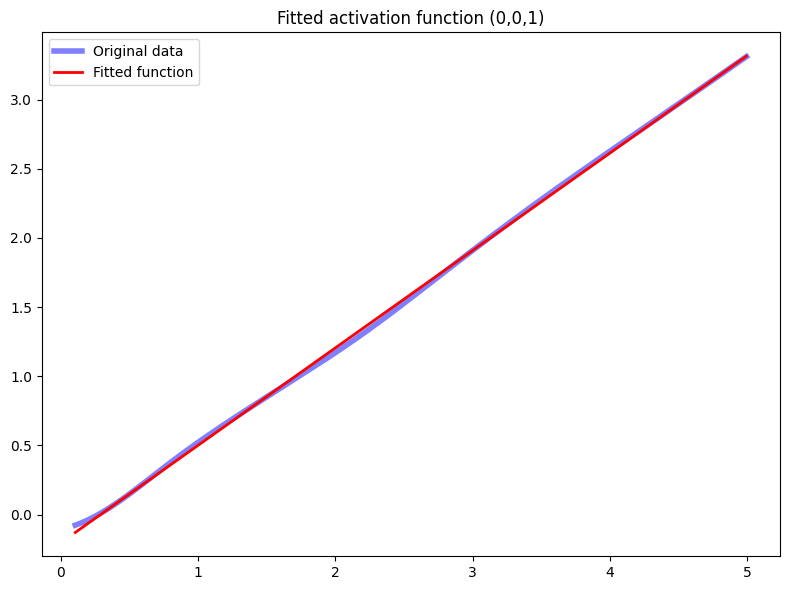

2025-04-12 13:39:40,739 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,0,0)


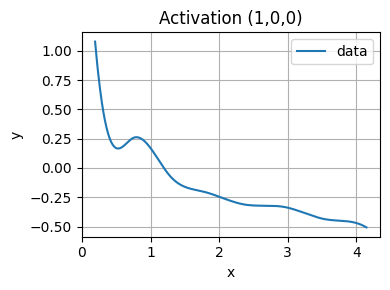

2025-04-12 13:39:40,808 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,0,0)
2025-04-12 13:39:40,810 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -3.064791440963745, for constant: [-0.14927042]
2025-04-12 13:39:40,810 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:39:43,067 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:39:43,067 - llmlex.llmlex - INFO - Initial population best: score=-0.21112704277038574, params=[ 0.71164169 -0.45684313  0.40425674], ansatz: params[0] * np.exp(-x) + params[1] * np.sin(params[2] * x)...


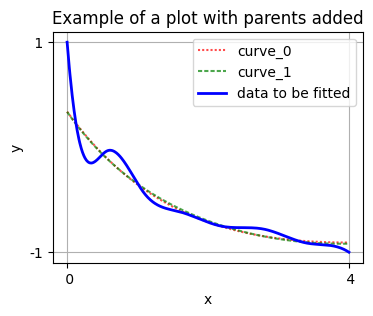

2025-04-12 13:39:43,120 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 13:39:45,464 - llmlex.llmlex - INFO - Generation 1 best: score=-0.1961906999349594, params=[ 1.80374894e+00  1.77475255e+00  1.58317765e-04  1.00993582e+00
 -1.22544110e-01], ansatz: params[0] * np.exp(-params[1] * x) * np.cos(params[2] * x + params[3]) + params[4] * x...
2025-04-12 13:39:45,465 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 13:39:45,465 - llmlex.llmlex - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,0,0): params[0] * np.exp(-params[1] * x) * np.cos(params[2] * x + params[3]) + params[4] * x, with score -0.1961906999349594 and parameters [ 1.804  1.775  0.     1.01  -0.123]


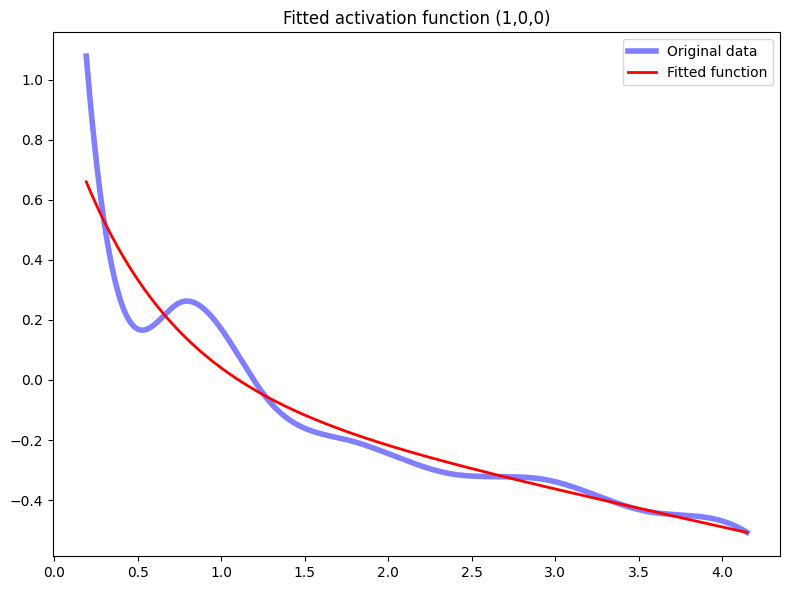

2025-04-12 13:39:45,564 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,1,0)


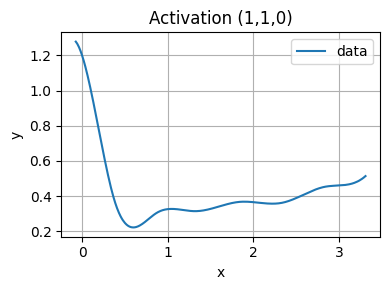

2025-04-12 13:39:45,625 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,1,0)
2025-04-12 13:39:45,626 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -20.439205169677734, for constant: [0.45091582]
2025-04-12 13:39:45,627 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:39:47,508 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:39:47,508 - llmlex.llmlex - INFO - Initial population best: score=-0.9365249872207642, params=[ 1.14802407  3.14945065 -0.47063951  0.41520134  3.21318981], ansatz: params[0] * np.exp(-params[1] * x) + params[2] * np.sin(params[3] * x + params[4])...


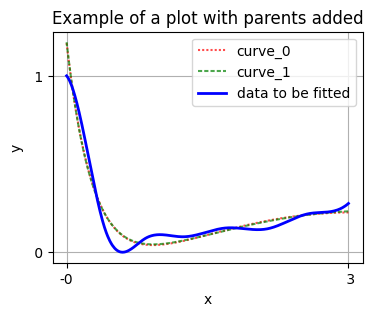

2025-04-12 13:39:47,568 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 13:39:51,989 - llmlex.llmlex - INFO - Generation 1 best: score=-0.7596034407615662, params=[ 1.33299173  2.53147772 -0.16293808  1.76007183  2.00898829  0.06538762], ansatz: params[0] * np.exp(-params[1] * x) + params[2] * np.sin(params[3] * x + params[4]) + params[5] * x**...
2025-04-12 13:39:51,990 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 13:39:51,990 - llmlex.llmlex - INFO - Successfully found expression for connection (1,1,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,1,0): params[0] * np.exp(-params[1] * x) + params[2] * np.sin(params[3] * x + params[4]) + params[5] * x**2, with score -0.7596034407615662 and parameters [ 1.333  2.531 -0.163  1.76   2.009  0.065]


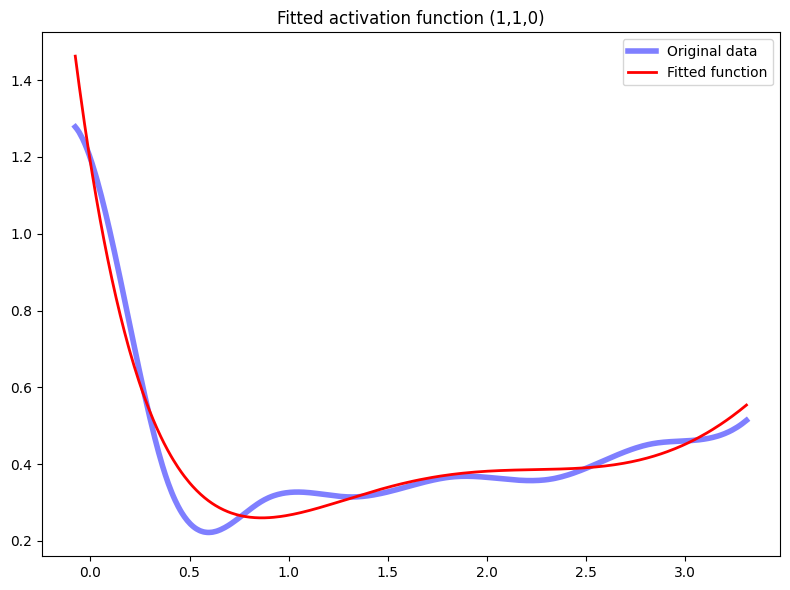

2025-04-12 13:39:52,068 - llmlex.llmlex - INFO - KAN conversion complete: 4 total connections
2025-04-12 13:39:52,069 - llmlex.llmlex - INFO - Connection breakdown: 0 symbolic, 0 zero, 4 processed
2025-04-12 13:39:52,220 - llmlex.llmlex - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-04-12 13:39:52,221 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 0): params[0] * x + params[1], has parameters [0.8 0.1]
2025-04-12 13:39:52,221 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 1): params[0] * x + params[1], has parameters [ 0.7 -0.2]
2025-04-12 13:39:52,222 - LLMLEx.kanLEx - INFO - Approximation for (1, 0, 0): params[0] * np.exp(-params[1] * x) * np.cos(params[2] * x + params[3]) + params[4] * x, has parameters [ 1.8  1.8  0.   1.  -0.1]
2025-04-12 13:39:52,223 - LLMLEx.kanLEx - INFO - Approximation for (1, 1, 0): params[0] * np.exp(-params[1] * x) + params[2] * np.sin(params[3] * x + params[4]) + params[5] * x**2, has parameters [ 1.3  2.5 -0.2  1.8  2.   

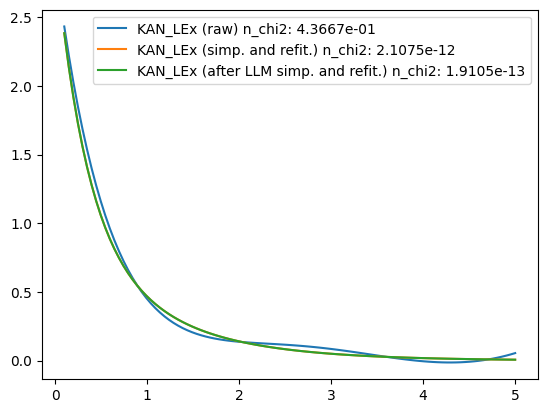

2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - 
###############################
# Raw and Refitted Results for output 0 (4sf): #
###############################
2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - Raw expression n_chi2 4.367e-01: -0.09903*x0 + 0.03242*(x0 - 0.2887)**2 - 0.1629*sin(1.239*x0 + 1.651) - 0.007553 + 2.23*exp(-1.782*x0) + 1.617*exp(-1.434*x0)*cos(0.0001279*x0 + 1.01)
2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - Refitted expression n_chi2 2.107e-12: 2*exp(-3*x0) + 1.67*exp(-1*x0)*cos(2.627e-05*x0 - 0.9287)
2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - Best LLM expression n_chi2 1.910e-13: (2.455*exp(2*x0)*cos(4.303e-05*x0 + 1.151) + 2)*exp(-3*x0)
2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - 
###############################
# Final formula for output 0: #
###############################
2025-04-12 13:40:29,886 - LLMLEx.kanLEx - INFO - Best expression n_chi2 1.910e-13 from LLMsimplified fit: (2.45509927467898*np.exp(2.00009650576704*x0)*np.cos(4.303497

In [7]:
best_expressions, best_chi_squareds, results_dicts, results_all_dicts = univariate_kansr.get_symbolic(
    client=client,
    population=3,
    generations=2,
    temperature=0.1,
    gpt_model="openai/gpt-4o",
    verbose=1,
    use_async=True,
    plot_fit=True,
    plot_parents=True,
    demonstrate_parent_plotting=True
)

In [8]:
best_expressions

['(2.45509927467898*np.exp(2.00009650576704*x0)*np.cos(4.30349754836e-5*x0 + 1.15128357596695) + 2)*np.exp(-3*x0)']

# $\times$ $\frac{x+4.11509}{x^3}$

In [5]:
def univariate_function(x):
    return (x[:,0]+ 4.11509)/x[:,0]**3.

# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 4, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:19:00,414 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 2.03e+02 | test_loss: 1.62e+02 | reg: 6.97e+02 | : 100%|█| 50/50 [00:30<00:00,  1.62it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:19:32,683 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:19:32,694 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:19:33,214 - LLMLEx.kanLEx - INFO - Final train loss: 203.46609497070312


203.46609497070312

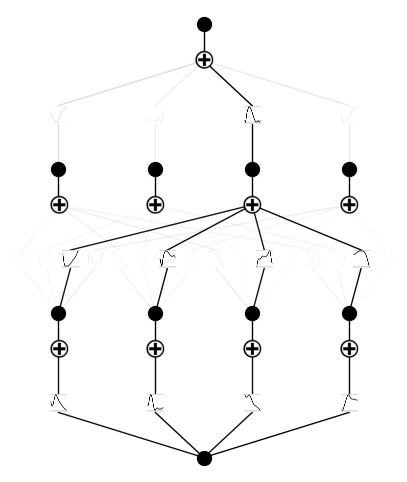

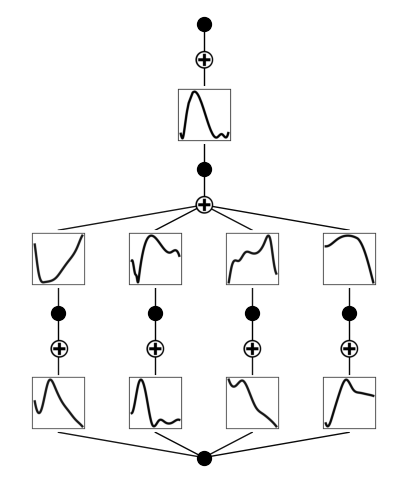

In [6]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

This suggests a [1,4,1] KAN

In [7]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:19:33,854 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.01e+02 | test_loss: 8.05e+01 | reg: 3.02e+02 | : 100%|█| 50/50 [00:11<00:00,  4.34it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:19:45,838 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:19:45,846 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:19:46,477 - LLMLEx.kanLEx - INFO - Final train loss: 101.35086822509766


101.35086822509766

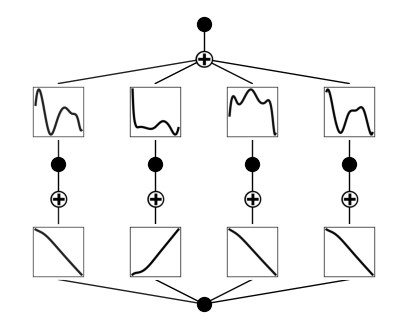

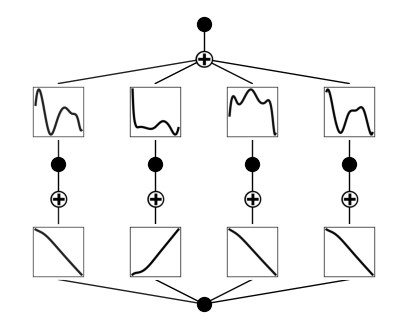

In [8]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

All are linear in first layer, and we have a large loss - not promising

In [9]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 2, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 14:17:48,821 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 5.98e+01 | test_loss: 5.29e+01 | reg: 2.49e+02 | : 100%|█| 50/50 [00:06<00:00,  7.35it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 14:17:55,857 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 14:17:55,865 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 14:17:56,090 - LLMLEx.kanLEx - INFO - Final train loss: 59.83644104003906


59.83644104003906

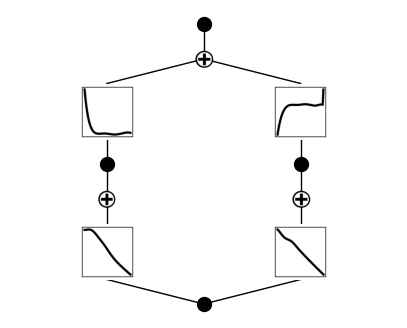

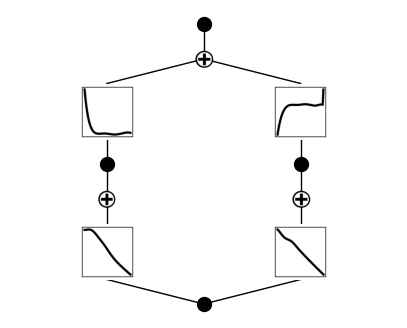

In [15]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

No point fitting with llm, as the KAN hasn't even fit to the data